In [1]:
import torch 
import torchvision
from torchvision import transforms
import torchvision.datasets as datasets
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from glob import glob
from PIL import Image

/Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2D1B8D5C-7891-3680-9CF9-F771AE880676> /Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <ADC0A61A-5B83-3A02-975F-EE5DFF441305> /Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### Data Loading

In [2]:
df_data = pd.read_csv("HAM10000_metadata")
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [3]:

img_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob((os.path.join('*', '*.jpg')))}

df_data['img_path'] = df_data['image_id'].map(img_path.get)

#drop rows with no image path
df_data.dropna(inplace=True)
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,img_path
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,HAM10000_images_part_2/ISIC_0031633.jpg
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,vidir_modern,HAM10000_images_part_1/ISIC_0025837.jpg


In [4]:
def load_image(image_path):
    try:
        image = Image.open(image_path)
        return np.asarray(image.resize((32, 32)))
    except Exception as e:
        print(f"Error loading image '{image_path}': {e}")
        return None

In [5]:
df_data['img'] = df_data['img_path'].map(load_image)
df_data.dropna()
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,img_path,img
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0025030.jpg,"[[[24, 14, 29], [56, 39, 64], [106, 80, 112], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0026769.jpg,"[[[190, 136, 150], [199, 145, 161], [200, 141,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,HAM10000_images_part_1/ISIC_0025661.jpg,"[[[35, 18, 28], [83, 51, 64], [128, 88, 103], ..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,HAM10000_images_part_2/ISIC_0031633.jpg,"[[[155, 110, 135], [188, 139, 168], [210, 157,..."
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,vidir_modern,HAM10000_images_part_1/ISIC_0025837.jpg,"[[[122, 82, 82], [158, 109, 112], [179, 120, 1..."


In [6]:
print(df_data.shape)
print(df_data['img'].iloc[10].shape)

(8039, 10)
(32, 32, 3)


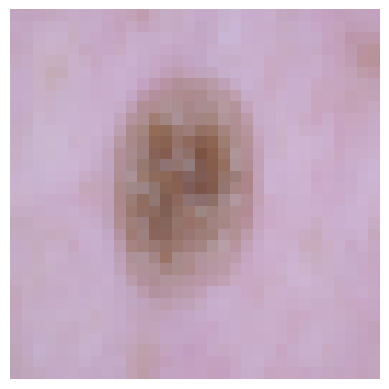

In [7]:
plt.imshow(df_data['img'].iloc[10], cmap = "Greys_r")
plt.gca().axis("off")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data[['lesion_id', 'img']], df_data['dx'], test_size=0.2, random_state=42)
X_train

,lesion_id,img
1156,HAM_0000827,"[[[168, 127, 129], [176, 136, 143], [178, 135,..."
373,HAM_0001389,"[[[140, 117, 129], [148, 126, 137], [154, 132,..."
5382,HAM_0002885,"[[[242, 169, 181], [234, 159, 169], [240, 165,..."
6162,HAM_0002309,"[[[232, 146, 157], [233, 145, 157], [236, 146,..."
7735,HAM_0006567,"[[[183, 164, 175], [182, 164, 175], [184, 165,..."
...,...,...
6604,HAM_0003747,"[[[225, 137, 148], [225, 138, 149], [223, 133,..."
6832,HAM_0000464,"[[[160, 128, 138], [165, 132, 143], [169, 136,..."
1081,HAM_0003715,"[[[215, 147, 140], [218, 149, 142], [220, 152,..."
9457,HAM_0000675,"[[[164, 136, 147], [168, 140, 153], [172, 144,..."


### First Logistic Regression Model

In [38]:
n, p = X_train.shape[0], X_train.shape[1] - 1

img_tensors = [torch.Tensor(img) for img in X_train['img'].values]
X_train['img_tensor'] = img_tensors
#print(X_train.shape)
#print(X_train["img"][10])

X_train_flat = torch.stack([img.flatten() for img in X_train['img_tensor']])
#X_train_flat.shape
print(X_train_flat)

tensor([[168., 127., 129.,  ...,  49.,  25.,  31.],
        [140., 117., 129.,  ..., 101.,  73.,  93.],
        [242., 169., 181.,  ..., 220., 154., 145.],
        ...,
        [215., 147., 140.,  ..., 188., 115., 109.],
        [164., 136., 147.,  ..., 156., 123., 137.],
        [145., 119., 120.,  ..., 169., 150., 159.]])


In [10]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
f = LR.fit(X_train_flat, y_train)

/Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
X_train_flat

tensor([[168., 127., 129.,  ...,  49.,  25.,  31.],
        [140., 117., 129.,  ..., 101.,  73.,  93.],
        [242., 169., 181.,  ..., 220., 154., 145.],
        ...,
        [215., 147., 140.,  ..., 188., 115., 109.],
        [164., 136., 147.,  ..., 156., 123., 137.],
        [145., 119., 120.,  ..., 169., 150., 159.]])

In [12]:
LR.score(X_train_flat, y_train)

0.7019126107914788

### Data Augmentation

Flip and rotate an image to increase dataset size

original image


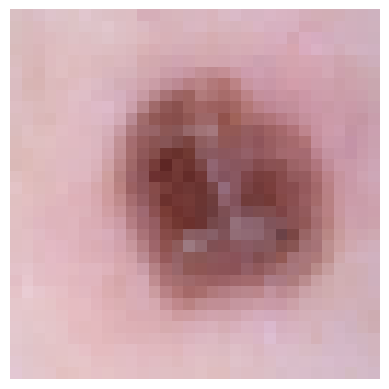

transformed image


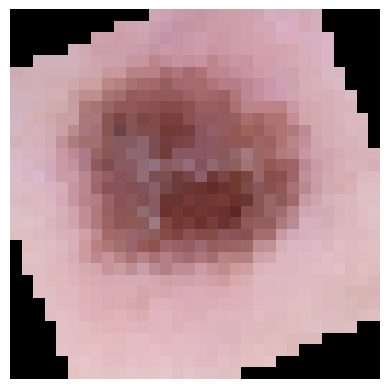

In [123]:
from torchvision.transforms import v2

# define desired transforms
transforms = v2.Compose([
    v2.RandomRotation(90),
    v2.RandomHorizontalFlip(p=0.5),
    ])

# prints image given ndarray representation
def show_image(img_array):
    plt.imshow(img_array, cmap = "Greys_r")
    plt.gca().axis("off")
    plt.show()

# define an image to transform (eventually -- loop through all images?)
img = X_train['img'][22]

### original image
print("original image")
show_image(img)

### transformed image
print("transformed image")
# convert image to PIL (python imaging library). Transforms are finicky
pil = Image.fromarray(img) 
# apply transforms
img_transformed = transforms(pil)
# convert back to numpy array (for eventually adding into df)
img_np = np.array(img_transformed)
show_image(img_np)